In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from scipy.stats import chi2_contingency,mannwhitneyu
sys.path.append('../src')
from utils.ClaseAbdon import DataFrameAnalyzer

In [39]:
df = pd.read_csv(r'..\data\raw\churn_telecomunicaciones.csv')

In [40]:
df.shape

(7043, 21)

In [41]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [44]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else x)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'] = df['TotalCharges'].fillna(df.TotalCharges.median())

### Reemplazamos valores vacios por la mediana

In [48]:
df.drop(['customerID'], inplace=True, axis=1)

In [49]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')
df['SeniorCitizen'] =  df['SeniorCitizen'].map({1:'Yes',0:'No'})
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[cols] = df[cols].replace('No internet service', 'No')


### Mapeamos no internet service por "No"

In [50]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

for col in cat_cols:
    unique_vals = df[col].unique()
    value_counts = df[col].value_counts()
    
    print(f"\n  {col.upper()} ({len(unique_vals)} valores únicos)")
    print("=" * 50)
    
    for val in unique_vals:
        count = value_counts[val]
        percentage = (count / len(df)) * 100
        print(f"  • {val:<15} → {count:>5} balance ({percentage:.1f}%)")


  GENDER (2 valores únicos)
  • Female          →  3488 balance (49.5%)
  • Male            →  3555 balance (50.5%)

  SENIORCITIZEN (2 valores únicos)
  • No              →  5901 balance (83.8%)
  • Yes             →  1142 balance (16.2%)

  PARTNER (2 valores únicos)
  • Yes             →  3402 balance (48.3%)
  • No              →  3641 balance (51.7%)

  DEPENDENTS (2 valores únicos)
  • No              →  4933 balance (70.0%)
  • Yes             →  2110 balance (30.0%)

  PHONESERVICE (2 valores únicos)
  • No              →   682 balance (9.7%)
  • Yes             →  6361 balance (90.3%)

  MULTIPLELINES (2 valores únicos)
  • No              →  4072 balance (57.8%)
  • Yes             →  2971 balance (42.2%)

  INTERNETSERVICE (3 valores únicos)
  • DSL             →  2421 balance (34.4%)
  • Fiber optic     →  3096 balance (44.0%)
  • No              →  1526 balance (21.7%)

  ONLINESECURITY (2 valores únicos)
  • No              →  5024 balance (71.3%)
  • Yes             →  

In [51]:
analyzer = DataFrameAnalyzer(df)

In [52]:
analyzer.resumen()

,Columna,Tipo de Dato,Cardinalidad,% Cardinalidad,Valores Faltantes,% Valores Faltantes,Categoría
0,gender,object,2,0.03,0,0.0,Binaria
1,SeniorCitizen,object,2,0.03,0,0.0,Binaria
2,Partner,object,2,0.03,0,0.0,Binaria
3,Dependents,object,2,0.03,0,0.0,Binaria
4,tenure,int64,73,1.04,0,0.0,Numérica Discreta
5,PhoneService,object,2,0.03,0,0.0,Binaria
6,MultipleLines,object,2,0.03,0,0.0,Binaria
7,InternetService,object,3,0.04,0,0.0,Categórica Nominal
8,OnlineSecurity,object,2,0.03,0,0.0,Binaria
9,OnlineBackup,object,2,0.03,0,0.0,Binaria


El dataset presenta una estructura limpia y completa, sin valores faltantes en ninguna de sus variables. Contiene un total de 20 columnas, siendo la mayoría de tipo binario o categórico nominal, lo que sugiere un enfoque enfocado en las decisiones y características del cliente. Variables como tenure, MonthlyCharges y TotalCharges ofrecen información cuantitativa clave sobre la relación con el cliente, siendo estas últimas especialmente relevantes por su alta cardinalidad. La variable objetivo Churn, de tipo binario, está bien definida y balanceada en términos de formato, lo que permitirá abordar con claridad un problema de clasificación supervisada.

Este dataset es adecuado para aplicar técnicas de análisis exploratorio, segmentación y modelado predictivo para identificar patrones de abandono y generar estrategias de retención.

In [53]:
analyzer.describe_numeric()

,count,mean,median,mode,std_dev,min,25%,50%,75%,max,skewness,kurtosis
tenure,7043.0,32.371149,29.000,1.00,24.559481,0.00,9.000,29.000,55.00,72.00,0.239540,-1.387372
MonthlyCharges,7043.0,64.761692,70.350,20.05,30.090047,18.25,35.500,70.350,89.85,118.75,-0.220524,-1.257260
TotalCharges,7043.0,2281.916928,1397.475,20.20,2265.270398,18.80,402.225,1397.475,3786.60,8684.80,0.963789,-0.226400


Las variables numéricas muestran características distintas en cuanto a su distribución:

- SeniorCitizen es una variable binaria codificada como 0 o 1, con solo un 16% de clientes mayores, lo que indica un desequilibrio en esta categoría. La alta asimetría positiva (skewness = 1.83) confirma este sesgo hacia el valor 0.

- Tenure, que representa la antigüedad del cliente, tiene una media de 32 meses y una mediana de 29, con valores que van de 0 a 72 meses. Su distribución es ligeramente asimétrica hacia la derecha (skewness = 0.24) y presenta una curtosis negativa, lo que sugiere una distribución más achatada que una normal.

- MonthlyCharges tiene una distribución bastante simétrica (skewness = -0.22) y un rango amplio (de $18.25 a $118.75), indicando que los clientes pagan tarifas muy variadas según los servicios contratados.

- TotalCharges presenta una alta dispersión (std ≈ 2265) y una asimetría moderada (skewness = 0.96), lo que refleja que algunos clientes acumulan cargos mucho más altos, probablemente por mayor permanencia o servicios premium.

Estas variables ofrecen un valor analítico importante, ya que pueden ser indicadoras tanto del nivel de fidelización como del riesgo de abandono, especialmente cuando se cruzan con la variable Churn.

In [54]:
analyzer.describe_categorical()

,unique_values,most_frequent,frequency,proportion
gender,2,Male,3555,50.48
SeniorCitizen,2,No,5901,83.79
Partner,2,No,3641,51.70
Dependents,2,No,4933,70.04
PhoneService,2,Yes,6361,90.32
MultipleLines,2,No,4072,57.82
InternetService,3,Fiber optic,3096,43.96
OnlineSecurity,2,No,5024,71.33
OnlineBackup,2,No,4614,65.51
DeviceProtection,2,No,4621,65.61


La mayoría de las variables categóricas están dominadas por una única categoría. Por ejemplo, la mayoría de los clientes no tienen dependientes (70%), no usan servicios como OnlineSecurity o TechSupport (más del 70%) y tienen contrato mensual (55%).

Además, el 73% no ha abandonado el servicio, lo que indica un cierto desbalance en la variable objetivo (Churn), a considerar durante el modelado. También destaca el alto uso de electronic check como método de pago (34%).

Estos desequilibrios podrían ser claves para identificar perfiles de riesgo de abandono.

------------------------------

## Detección de Outliers.

In [55]:
def outliers(df, col, mode='detect'):
    """
    Detecta o elimina outliers usando el método IQR.

    Parámetros:
        df : DataFrame
        col : str - nombre de la columna numérica
        mode : str - 'detect' para obtener los outliers, 'remove' para eliminarlos

    Retorna:
        DataFrame con los outliers detectados o con los outliers eliminados
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    if mode == 'detect':
        return df[(df[col] < lower) | (df[col] > upper)]
    elif mode == 'remove':
        return df[(df[col] >= lower) & (df[col] <= upper)]
    else:
        raise ValueError("El parámetro 'mode' debe ser 'detect' o 'remove'")

In [56]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for var in num_features:
    outl = outliers(df,var,'detect')
    print(f'Outliers en {var}: {len(outl)}')

Outliers en tenure: 0
Outliers en MonthlyCharges: 0
Outliers en TotalCharges: 0


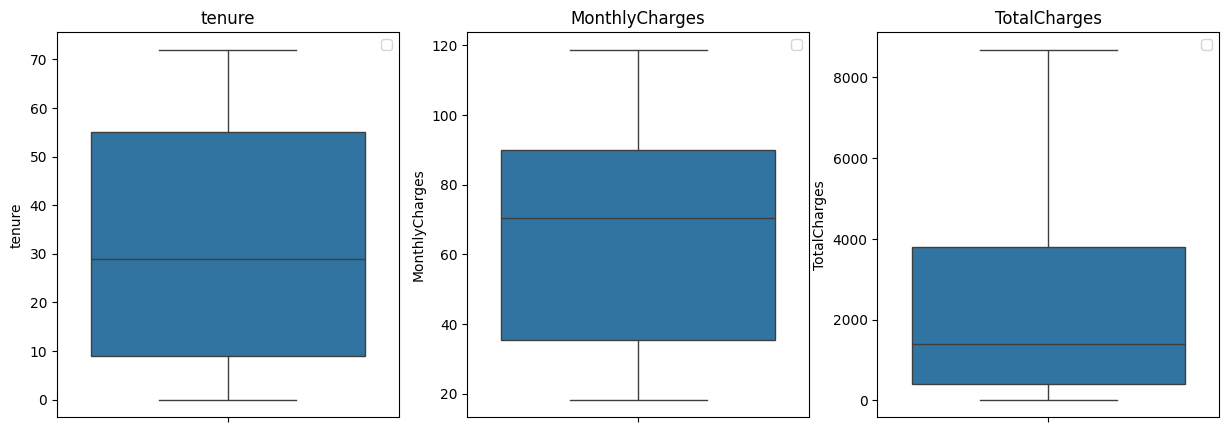

In [57]:
plt.figure(figsize=(15, 5))

for i, column in enumerate(num_features):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[column],showfliers=True)
    plt.title(f'{column}')
    plt.legend()

#### Tras aplicar la regla del IQR a las variables numéricas tenure, MonthlyCharges y TotalCharges, no se detectaron outliers extremos visualmente significativos. Aunque existen algunos valores altos en MonthlyCharges y TotalCharges, estos son coherentes con clientes de larga permanencia o servicios premium. Dado que los valores no resultan erróneos ni influyen negativamente en la interpretación, se conservarán todos los registros para el análisis y modelado.

-----------------------------------------------

## Análisis Univariante

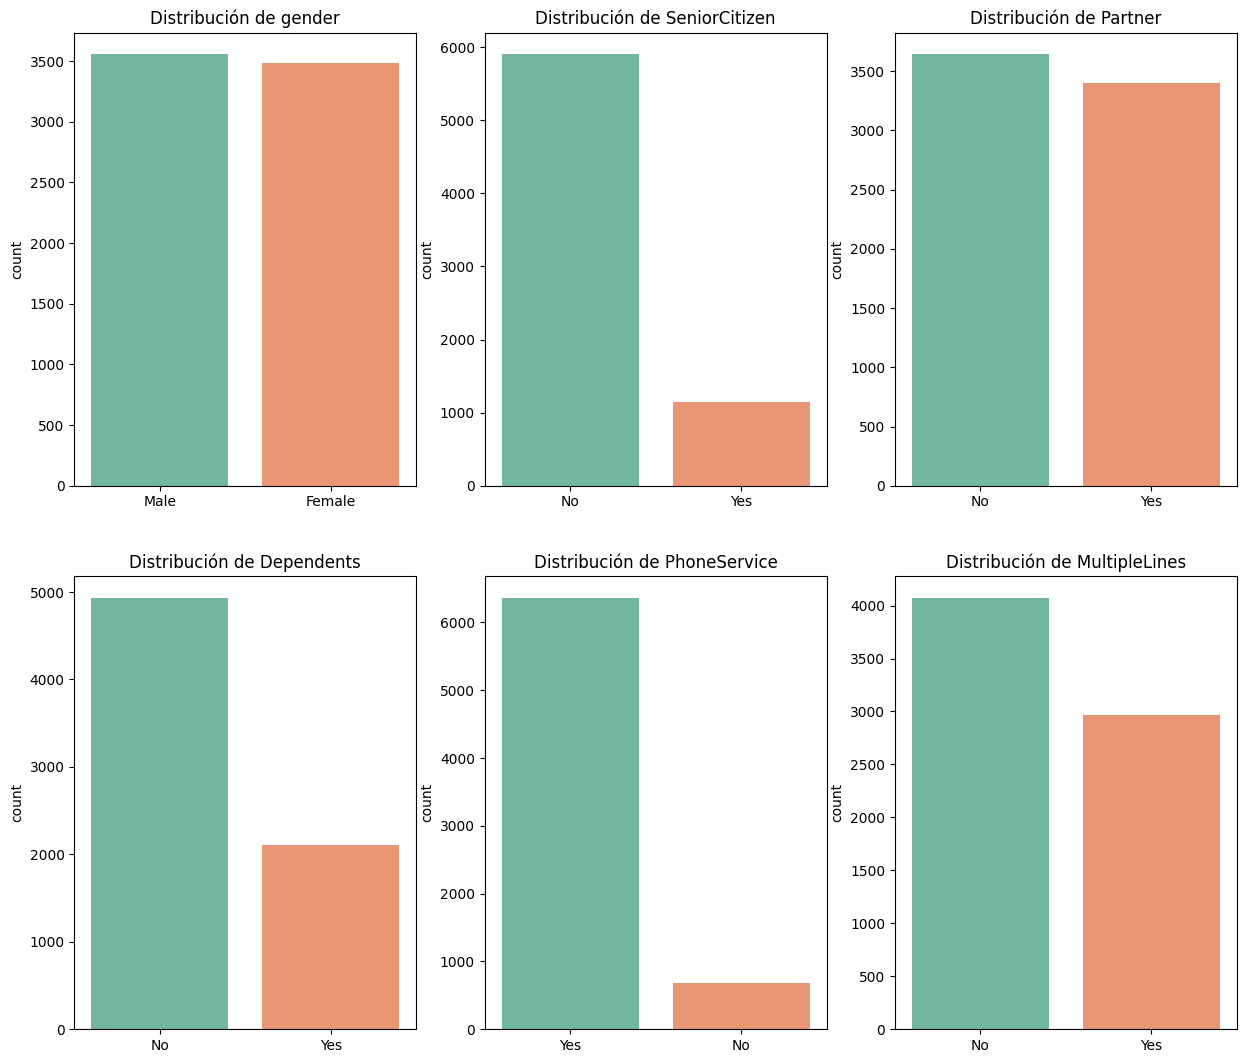

In [58]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                'MultipleLines', ]

plt.figure(figsize=(15, 20))

for i, column in enumerate(cat_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='Set2')
    plt.xlabel('')
    plt.title(f'Distribución de {column}')

**gender:** La distribución es equilibrada entre hombres y mujeres, por lo que no se espera que esta variable por sí sola tenga gran poder discriminativo respecto al abandono.

**SeniorCitizen:** Solo un 16% de los clientes son mayores (valor 1), lo que indica una fuerte desproporción. Será útil ver si este grupo tiene mayor tasa de abandono.

**PartneryDependents:** La mayoría de los clientes no tienen pareja ni dependientes, lo que puede estar vinculado a un perfil más independiente o joven.

**PhoneService:** Más del 90% tiene servicio telefónico, por lo tanto no aportará mucha variabilidad al modelo por sí sola.

**MultipleLines:** Hay una mayor proporción de clientes sin líneas adicionales.

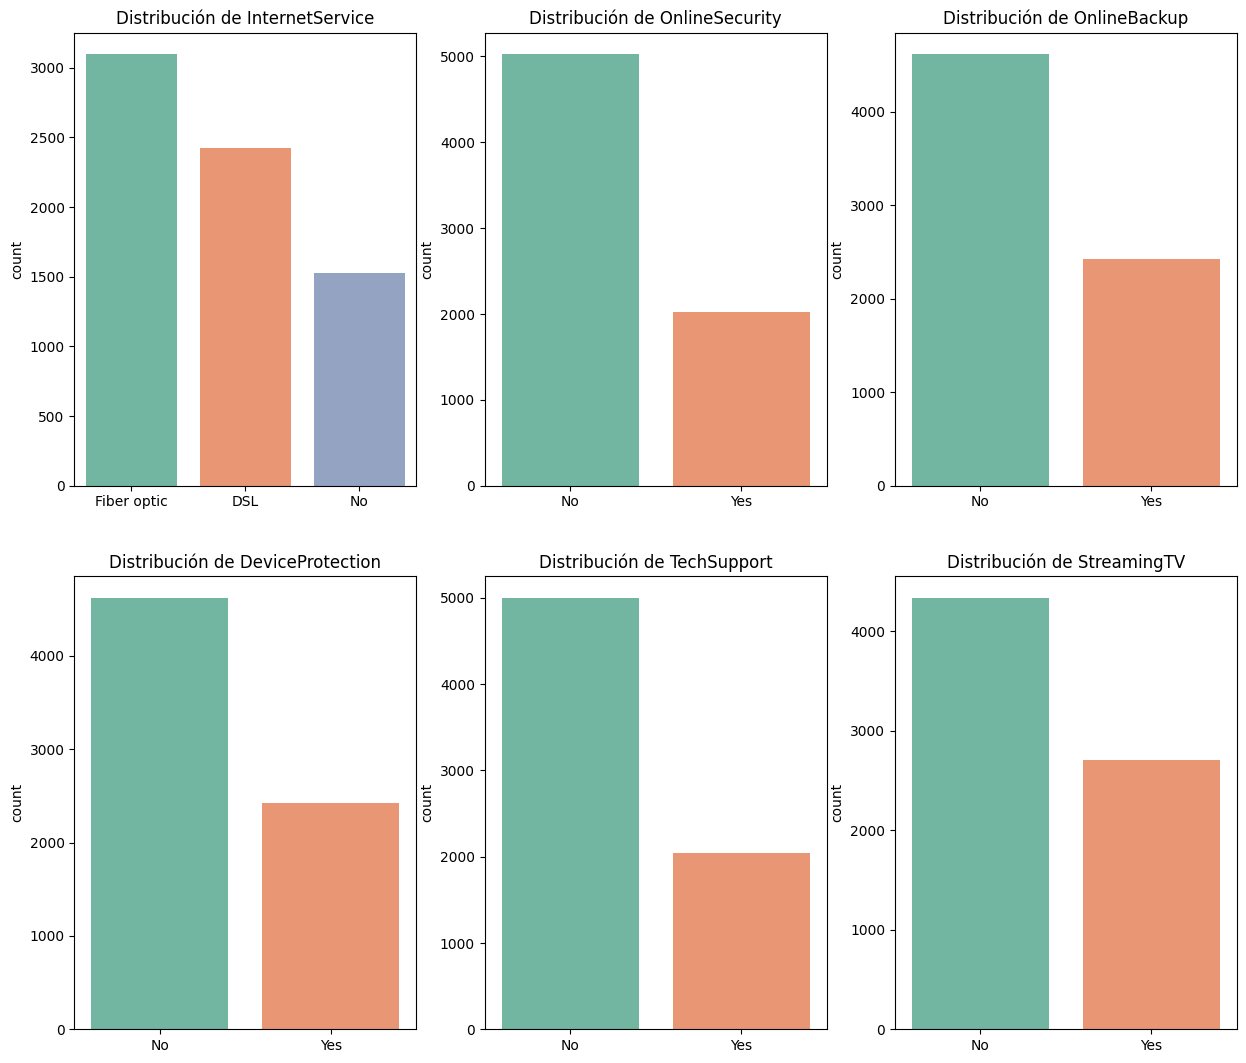

In [59]:
cat_features = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', ]

plt.figure(figsize=(15, 20))

for i, column in enumerate(cat_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='Set2')
    plt.xlabel('')
    plt.title(f'Distribución de {column}')

- **InternetService:** La mayoría de los clientes tiene servicio de internet , principalmente por fibra óptica , seguido por DSL. Un grupo minoritario no tiene internet, lo que podría limitar su uso de otros servicios adicionales.

- **Online Security, Online Backup, DeviceProtection, TechSupport:** En todos estos servicios, la categoría "No" domina claramente , lo que indica que muchos clientes no contratan servicios complementarios de protección o soporte. Esto podría estar vinculado a un menor nivel de fidelización o menor percepción de valor agregado.

- **StreamingTV:** La mayoría no tiene contratado el servicio de televisión por streaming, aunque el grupo con “Yes” también es representativo.

La baja contratación de servicios adicionales puede reflejar una relación débil con la empresa, y en análisis posteriores será clave ver si esto se asocia con mayor probabilidad de abandono **(Churn)**.

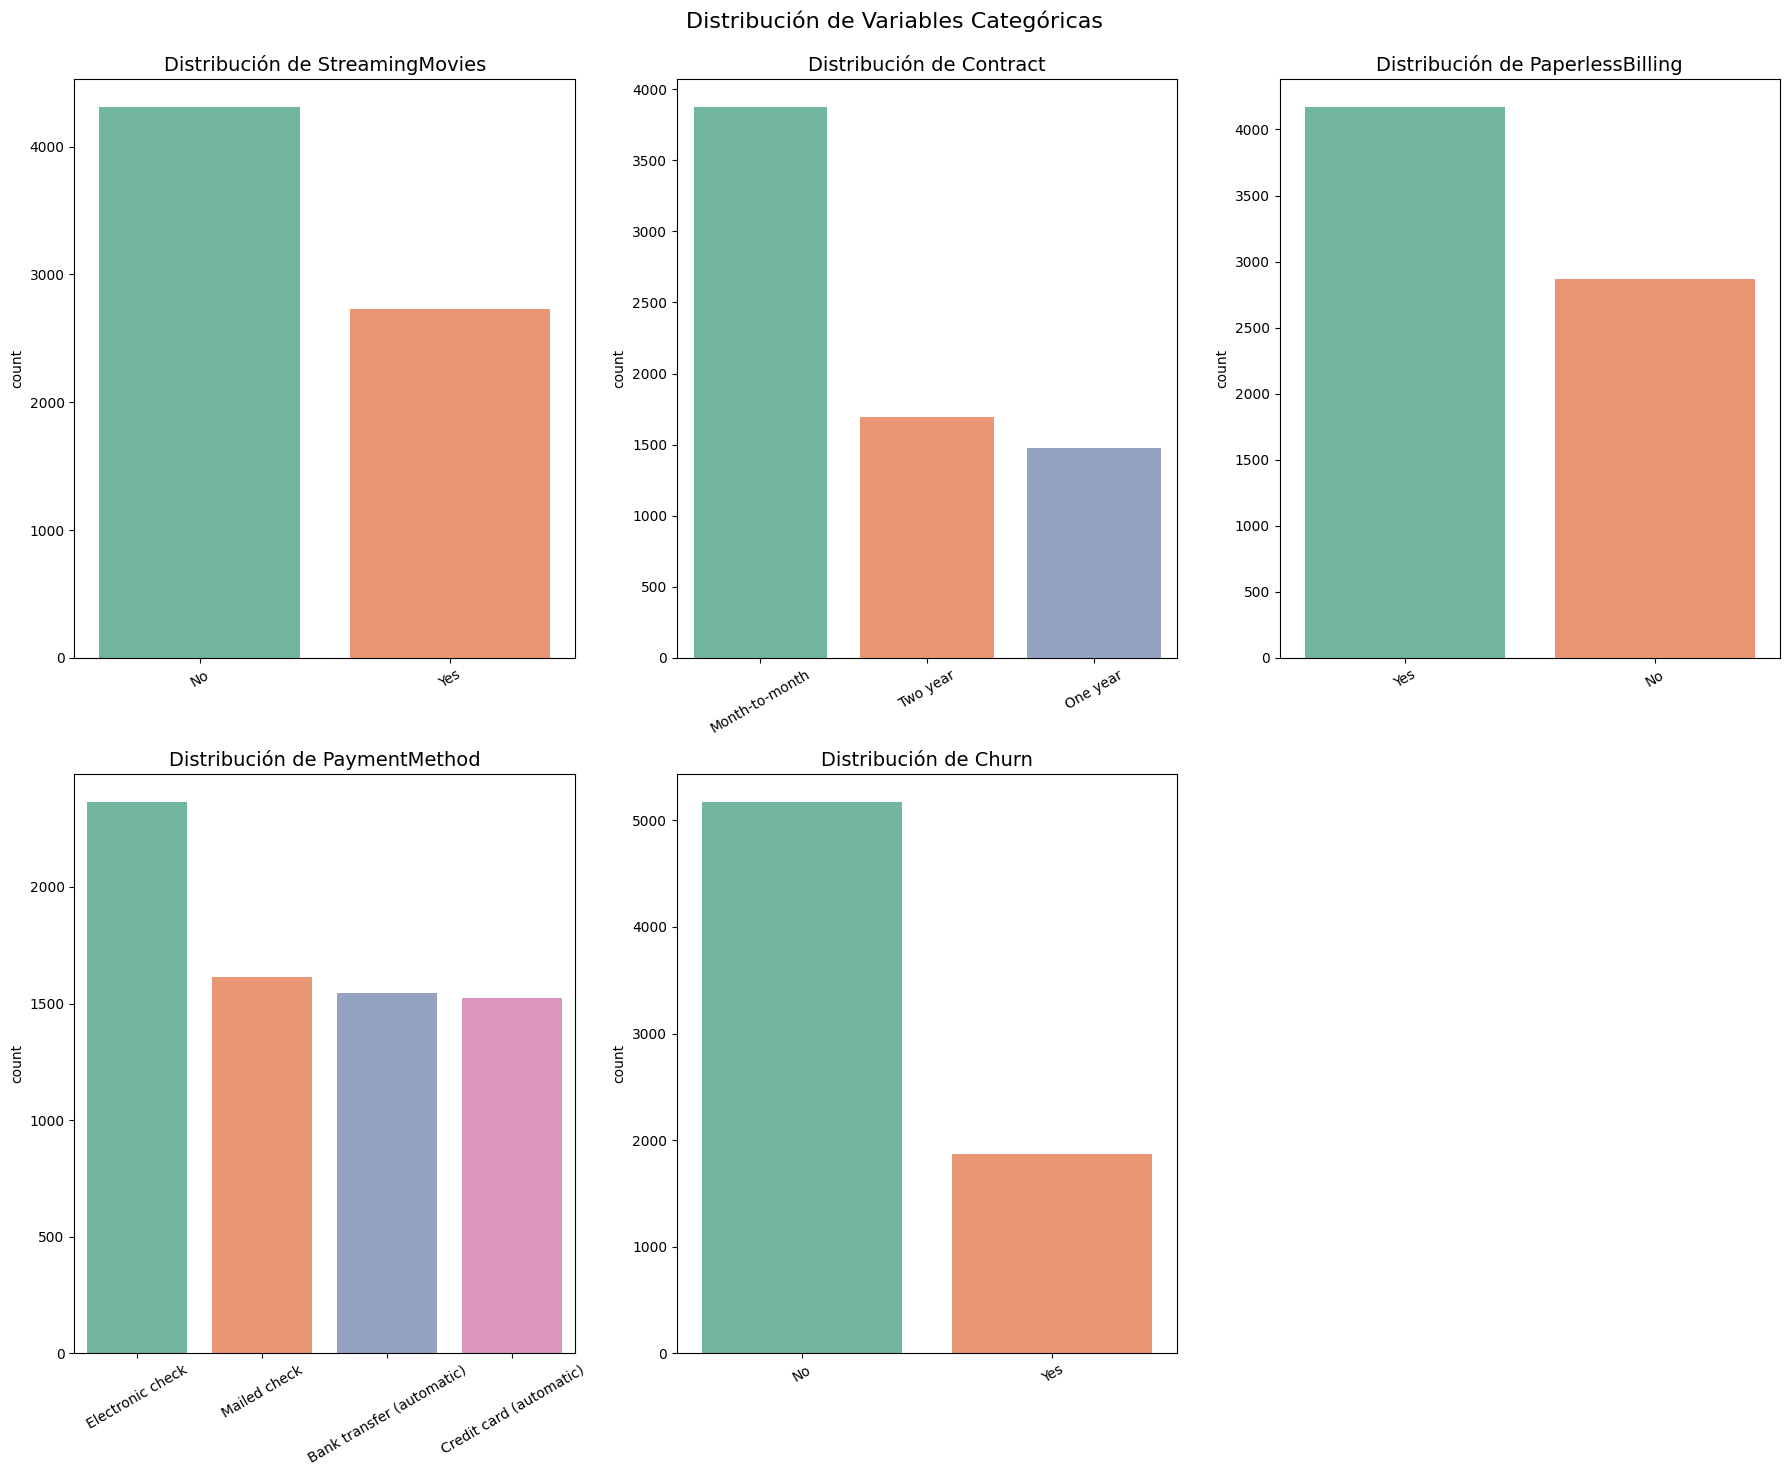

In [60]:
cat_features = ['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plt.figure(figsize=(18, 15))

for i, column in enumerate(cat_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette='Set2')
    plt.title(f'Distribución de {column}', fontsize=14)
    plt.xlabel('')
    plt.xticks(rotation=30)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # deja espacio arriba
plt.suptitle('Distribución de Variables Categóricas', fontsize=16)
plt.show()

**StreamingMovies:** La mayoría de los clientes no tiene contratado este servicio. Puede indicar bajo interés o falta de necesidad, aunque también podría reflejar poca adopción de productos adicionales.

**Contract:** Más de la mitad de los clientes tiene contrato mensual, seguido por planes anuales. Los contratos mensuales suelen asociarse a mayor riesgo de abandono, algo a analizar en la fase bivariada.

**PaperlessBilling:** Hay una preferencia moderada por la facturación electrónica , lo que podría estar relacionado con hábitos más digitales.

**PaymentMethod:** El método más usado es “Cheque electrónico”, seguido por métodos automáticos. Esta variable puede tener relevancia si ciertos métodos se asocian con mayor o menor abandono.

**Churn:** Solo el 27% de los clientes han abandonado, lo que implica un conjunto de datos desequilibrado. Esto deberá considerar al aplicar modelos predictivos.

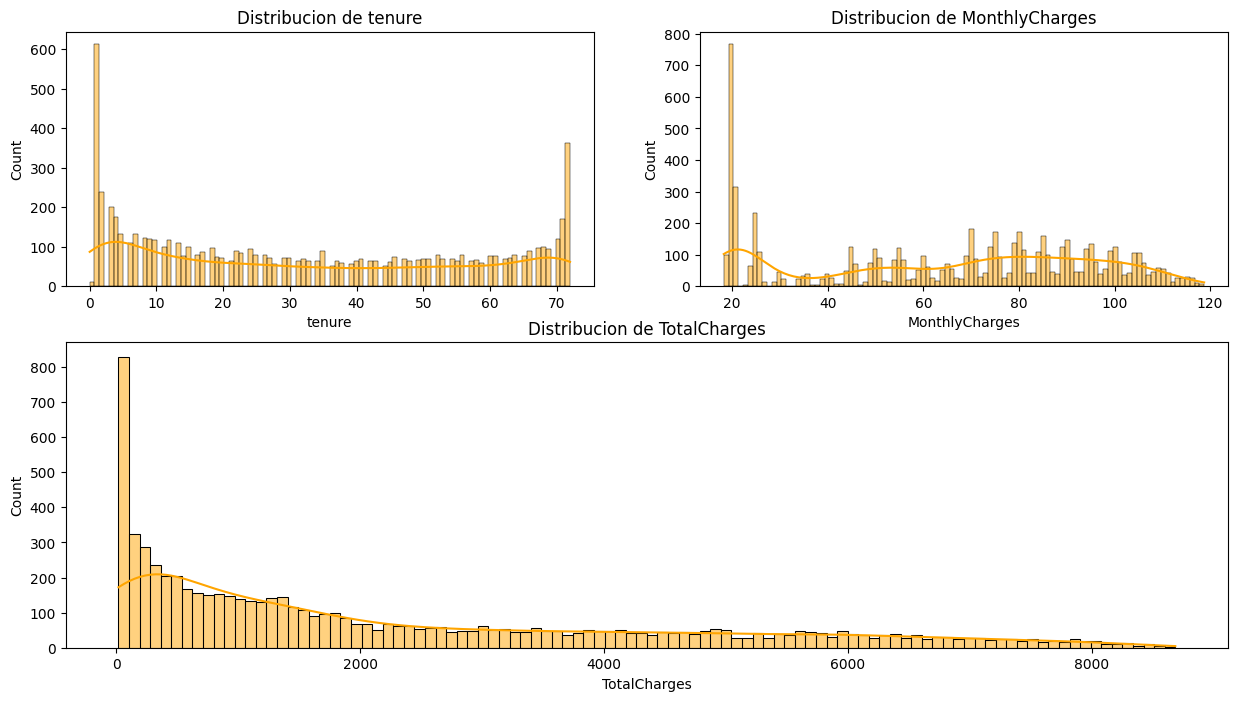

In [61]:
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Distribucion de tenure')
sns.histplot(
    df['tenure'],
    bins=100,
    kde=True,
    color='orange',ax=ax1)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Distribucion de MonthlyCharges')
sns.histplot(
    df['MonthlyCharges'],
    bins=100,
    kde=True,
    color='orange',ax=ax2)

ax3 = fig.add_subplot(gs[1, :])
ax3.set_title('Distribucion de TotalCharges')
sns.histplot(
    df['TotalCharges'],
    bins=100,
    kde=True,
    color='orange',ax=ax3);

**Tenure:** tiene una base de clientes bimodal muchos nuevos y muchos leales. Esto sugiere que hay una entrada constante de nuevos clientes, pero también una porción significativa que permanece a largo plazo.

**MonthlyCharges:** La mayoría de los clientes se agrupan en un rango medio de cargos mensuales, con una ligera cola hacia valores más altos. La oferta de planes parece estar centrada en precios medios, aunque hay una fracción de clientes con cargos elevados que podrían estar usando servicios premium.

**TotalCharges:** Hay una gran diversidad en el valor económico de los clientes. Algunos apenas han generado ingresos (nuevos), mientras que otros representan un alto valor acumulado.

-------------------------------------------------------

### Análisis Bivariante

In [62]:
analyzer.test_normalidad()

['Columna: tenure               | Estadístico: 76258.505174 | P-Valor: 0.0',
 'Columna: MonthlyCharges       | Estadístico: 11419.528789 | P-Valor: 0.0',
 'Columna: TotalCharges         | Estadístico: 808.866142 | P-Valor: 2.2748300837290998e-176']

Las variables tenure, MonthlyCharges y TotalCharges no siguen una distribución normal, ya que en todos los casos el p-valor fue menor a 0.05. Esto indica que se rechaza la hipótesis nula de normalidad para cada una de ellas. Se aplicaran tests estadisticos no parametricos.

-----------------------------------

Vamos a realizar test de CHI2 de todas las variables categoricas contra la target (churm).

In [63]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r - 1, k - 1))

In [64]:
cat_vars = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for var in cat_vars:
    tabla = pd.crosstab(df[var], df['Churn'])
    chi2, p, dof, ex = chi2_contingency(tabla)
    print(f"\n{var.upper()}:")
    print(f"Chi2 = {chi2:.2f}, p-valor = {p:.4f}")
    if p < 0.05:
        print("→ Relación estadísticamente significativa con Churn ✅.")
        print(f"Tests Cramer's V = {round(cramers_v(df[var], df['Churn']),3)}")
    else:
        print("→ No hay relación significativa con Churn 🔴.")
        print(f"Tests Cramer's V = {round(cramers_v(df[var], df['Churn']),3)}")


GENDER:
Chi2 = 0.48, p-valor = 0.4866
→ No hay relación significativa con Churn 🔴.
Tests Cramer's V = 0.008

SENIORCITIZEN:
Chi2 = 159.43, p-valor = 0.0000
→ Relación estadísticamente significativa con Churn ✅.
Tests Cramer's V = 0.15

PARTNER:
Chi2 = 158.73, p-valor = 0.0000
→ Relación estadísticamente significativa con Churn ✅.
Tests Cramer's V = 0.15

DEPENDENTS:
Chi2 = 189.13, p-valor = 0.0000
→ Relación estadísticamente significativa con Churn ✅.
Tests Cramer's V = 0.164

PHONESERVICE:
Chi2 = 0.92, p-valor = 0.3388
→ No hay relación significativa con Churn 🔴.
Tests Cramer's V = 0.011

MULTIPLELINES:
Chi2 = 11.14, p-valor = 0.0008
→ Relación estadísticamente significativa con Churn ✅.
Tests Cramer's V = 0.04

INTERNETSERVICE:
Chi2 = 732.31, p-valor = 0.0000
→ Relación estadísticamente significativa con Churn ✅.
Tests Cramer's V = 0.322

ONLINESECURITY:
Chi2 = 205.63, p-valor = 0.0000
→ Relación estadísticamente significativa con Churn ✅.
Tests Cramer's V = 0.171

ONLINEBACKUP:
Chi

Se realizó un análisis bivariante entre la variable objetivo `Churn(baja de clientes)` y Múltiples variables categóricas utilizando la prueba de Chi-cuadrado de independencia, que permite evaluar si existe una relación estadísticamente significativa entre dos variables cualitativas. Como complemento, se aplicó el estadístico de Cramér's V, que cuantifica la fuerza de dicha relación independientemente del tamaño de la muestra.

Los resultados indican que no existe una asociación significativa entre `gender y PhoneService` con la baja de clientes, ya que sus p-valores fueron superiores al umbral compartido aceptado (0.05). Además, sus valores de Cramér's V fueron extremadamente bajos (0.008 y 0.011 respectivamente), lo que refuerza la idea de que estas variables apenas aportan información útil respecto al comportamiento de baja.

Por otro lado, se detectó una relación estadísticamente significativa (p < 0,05) entre Churn y variables como `SeniorCitizen, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBillingy PaymentMethod.` No obstante, al complementar este análisis con Cramér's V, se que observará que no todas las relaciones son iguales de intensas.

En particular, variables como `Contract(V = 0.41), InternetService(V = 0.322) y PaymentMethod(V = 0.303)` muestran una fuerte asociación con la baja, por lo que pueden considerarse como variables clave para explicar o anticipar el abandono. Otras variables como `Partner, TechSupport, OnlineSecurityo SeniorCitizen` presentan una relación significativa pero de intensidad baja a moderada, lo que indica que podrían actuar como factores de soporte en un modelo, más que como predictores principales.

En conjunto, estas variables son buenas candidatas para ser utilizadas en modelos predictivos de baja de clientes, o bien para diseñar estrategias de retención personalizadas según las características del.

In [65]:
significativas = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']

for var in significativas:
    print('-'*40)
    print(f"\n{var.upper()}:")
    tabla = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    print(tabla.round(2))

----------------------------------------

SENIORCITIZEN:
Churn             No    Yes
SeniorCitizen              
No             76.39  23.61
Yes            58.32  41.68
----------------------------------------

PARTNER:
Churn       No    Yes
Partner              
No       67.04  32.96
Yes      80.34  19.66
----------------------------------------

DEPENDENTS:
Churn          No    Yes
Dependents              
No          68.72  31.28
Yes         84.55  15.45
----------------------------------------

MULTIPLELINES:
Churn             No    Yes
MultipleLines              
No             74.98  25.02
Yes            71.39  28.61
----------------------------------------

INTERNETSERVICE:
Churn               No    Yes
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40
----------------------------------------

ONLINESECURITY:
Churn              No    Yes
OnlineSecurity              
No              68.67  31.33
Yes            

**Perfil demográfico:**
- `SeniorCitizen:` Los adultos mayores tienen una tasa de baja significativamente más alta (41.68%) que los no mayores (23.61%).
- `Partner y Dependents:` Tener pareja o dependientes se asocia con menor tasa de baja. Esto sugiere que clientes con responsabilidades familiares tienden a ser más estables.

**Servicios contratados:**
- `InternetService:` Los usuarios de Fiber optic presentan la tasa de baja más alta (41.89%), mientras que los que no tienen servicio de internet tienen la más baja (7.40%). Esto podría indicar problemas de satisfacción o precio en ese segmento.
- `OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport:` En todos los casos, tener el servicio contratado se asocia con una menor tasa de baja, lo que sugiere que estos servicios adicionales podrían estar vinculados a una mayor fidelización.

**Entretenimiento:**
- `StreamingTV y StreamingMovies:` Los clientes que usan estos servicios tienen una tasa de baja ligeramente mayor, lo que podría estar relacionado con un perfil de cliente más digital y posiblemente más exigente.

**Tipo de contrato y facturación:**
- `Contract:` La tasa de baja es mucho mayor en contratos mensuales (42.71%) en comparación con contratos de uno o dos años (11.27% y 2.83%, respectivamente). Esto refuerza la importancia de promover contratos a largo plazo.
- `PaperlessBilling:` Los clientes con facturación electrónica tienen una tasa de baja más alta (33.57%), lo que podría estar relacionado con un perfil más digital, similar al de los usuarios de servicios de streaming.

#### Los clientes con contratos mensuales, sin servicios adicionales, usuarios de fibra óptica, y sin responsabilidades familiares presentan mayores tasas de baja. Estos perfiles deben ser el foco de estrategias de retención personalizadas.

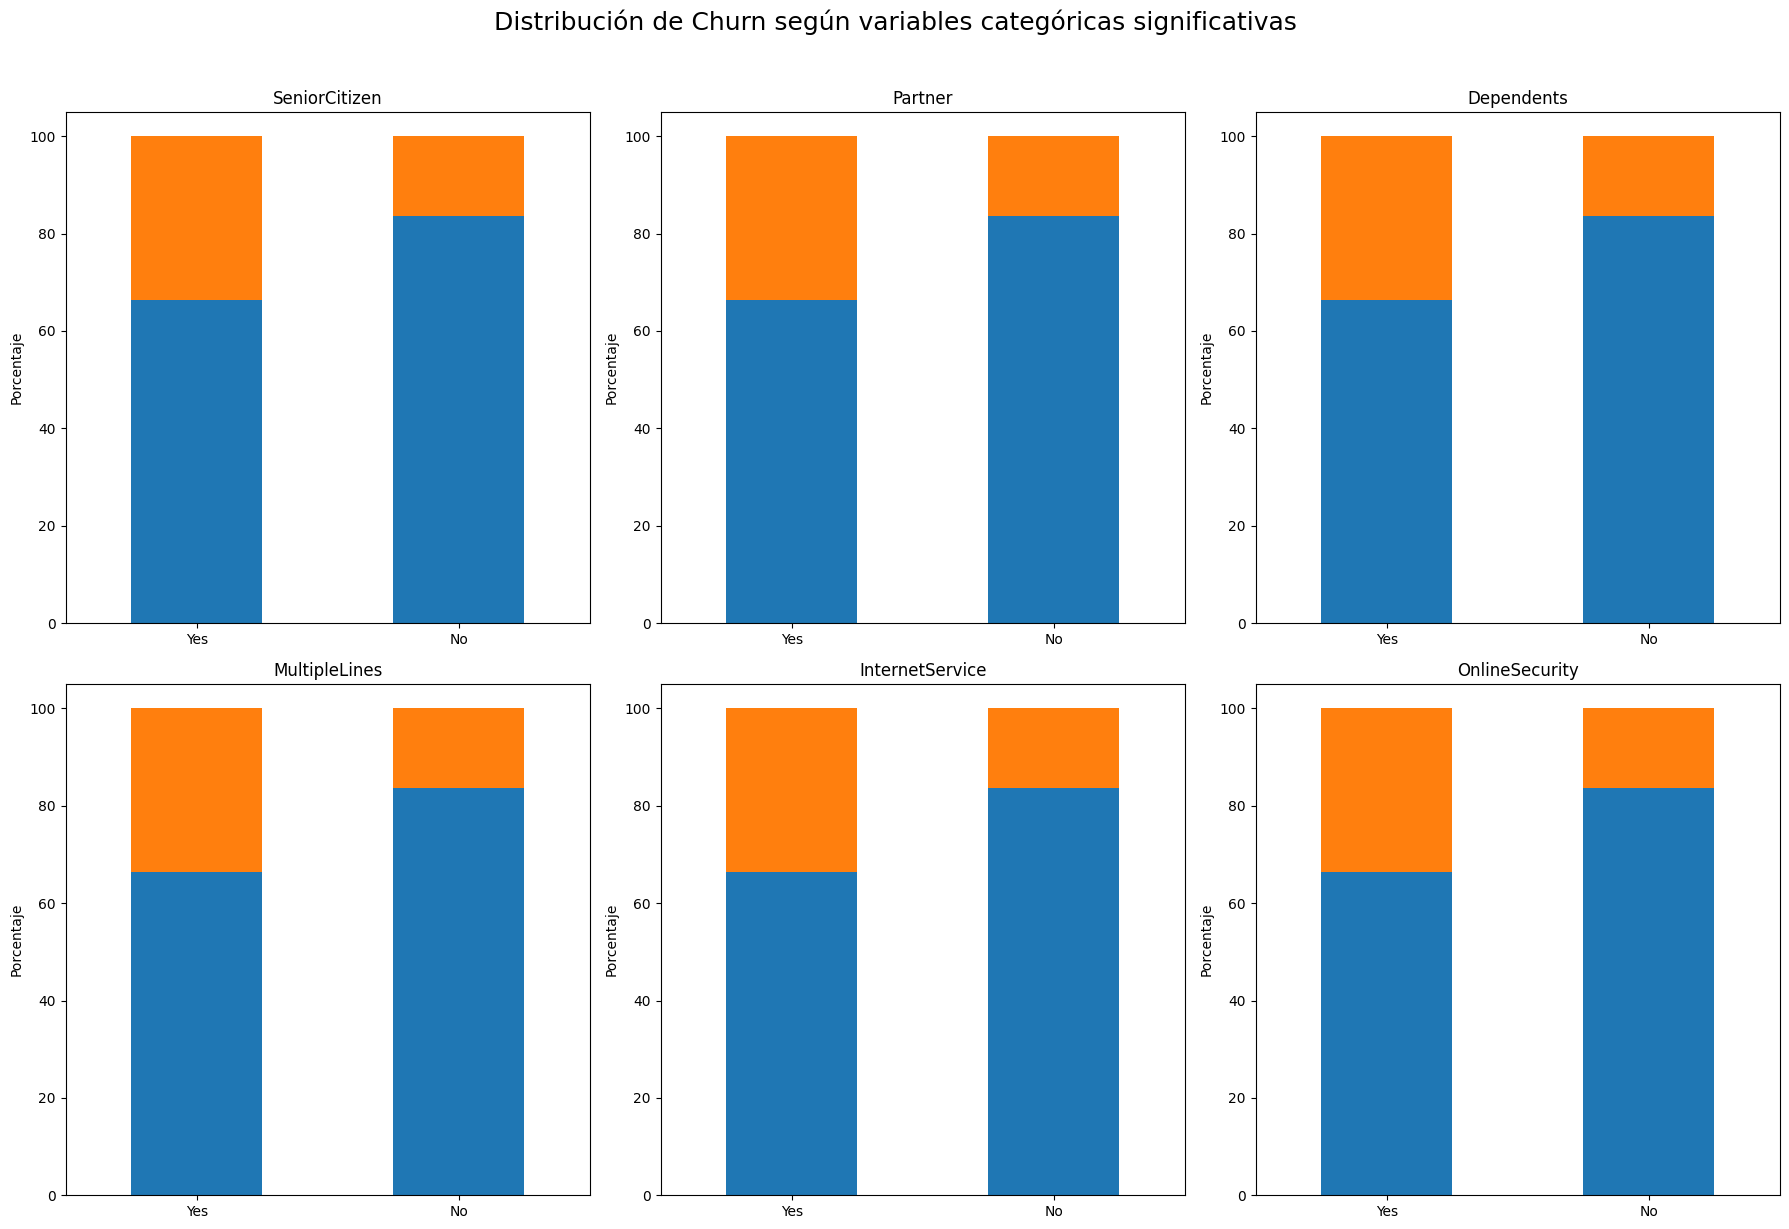

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()


for i, column in enumerate(significativas[0:6]):
    tabla = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    tabla = tabla.sort_values(by='Yes', ascending=False)
    tabla[['No', 'Yes']].plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(f"{column}")
    axes[i].set_ylabel("Porcentaje")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=0)
fig.suptitle("Distribución de Churn según variables categóricas significativas", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

#### Confirmando (visualmente) la conclusión anterior, las variables con relación significativa con Churn muestran diferencias claras en las tasas de baja. Por ejemplo, los clientes sin dependientes (31.28%), usuarios de fibra óptica (41.89%) y quienes tienen contrato mensual (42.71%) presentan porcentajes de baja considerablemente más altos que sus contrapartes.

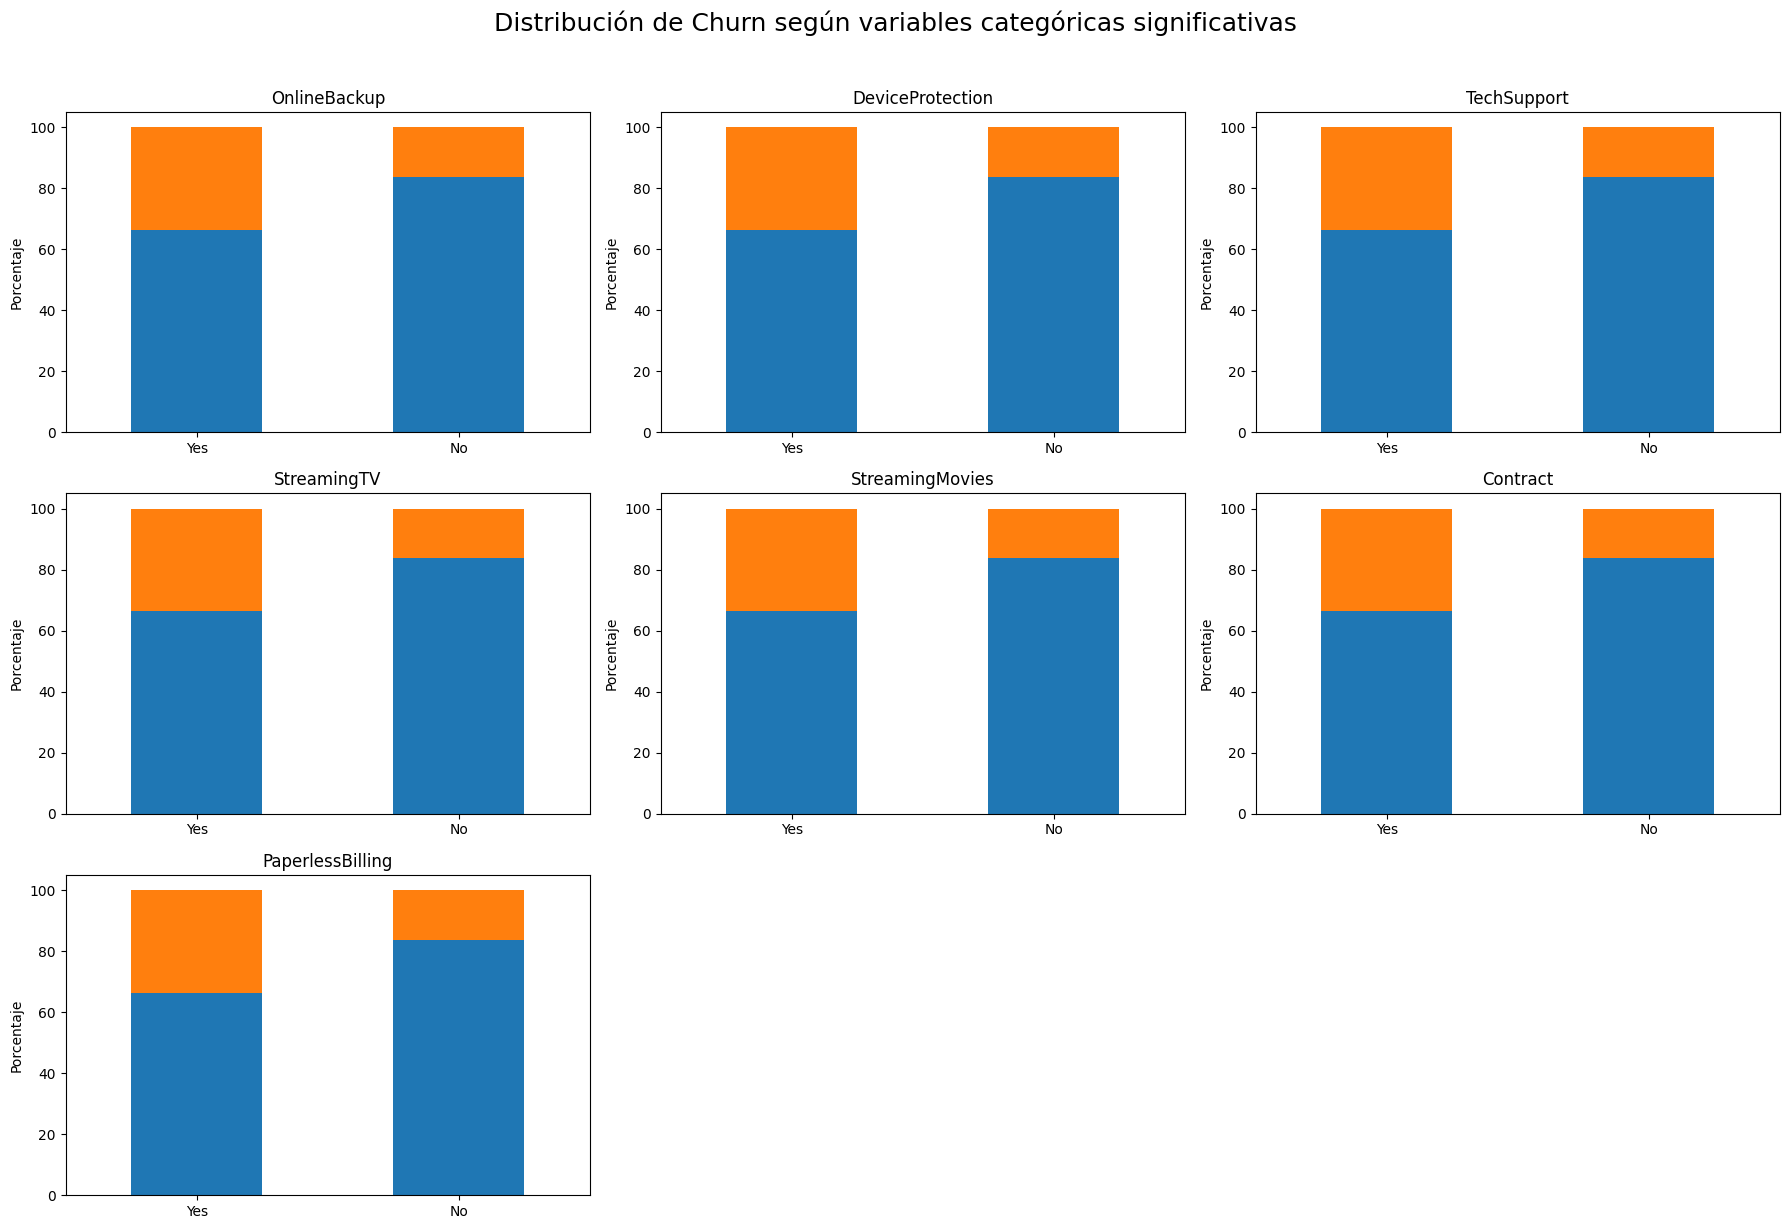

In [67]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()


for i, column in enumerate(significativas[6::]):
    tabla = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    tabla = tabla.sort_values(by='Yes', ascending=False)
    tabla[['No', 'Yes']].plot(kind='bar', stacked=True, ax=axes[i], legend=False)
    axes[i].set_title(f"{column}")
    axes[i].set_ylabel("Porcentaje")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=0)

for j in range(len(significativas[6::]), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribución de Churn según variables categóricas significativas", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

#### Confirmando (visualmente) los resultados anteriores, los gráficos muestran que los clientes que no tienen servicios como OnlineBackup, DeviceProtection o TechSupport, así como aquellos con contrato mensual o facturación electrónica, presentan porcentajes de baja notablemente más altos. Estas diferencias visuales refuerzan la importancia de estas variables en la retención de clientes.

In [68]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

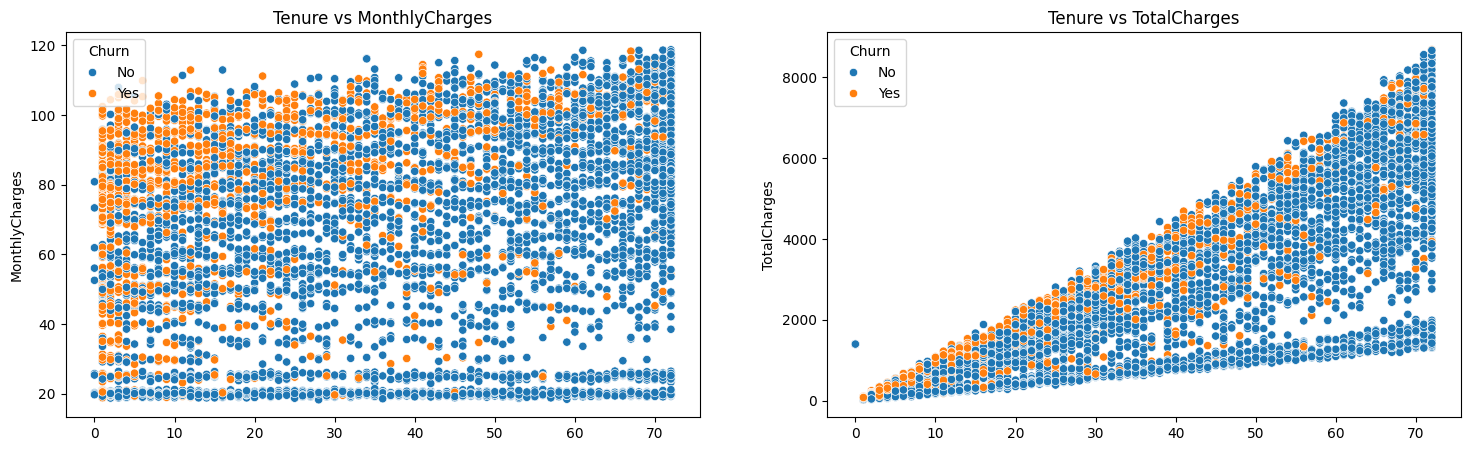

In [69]:
plt.figure(figsize=(18, 5))

for i, column in enumerate(num_cols[1::]):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(data=df, x='tenure', y=column, hue='Churn')
    plt.xlabel('')
    plt.title(f'Tenure vs {column}')

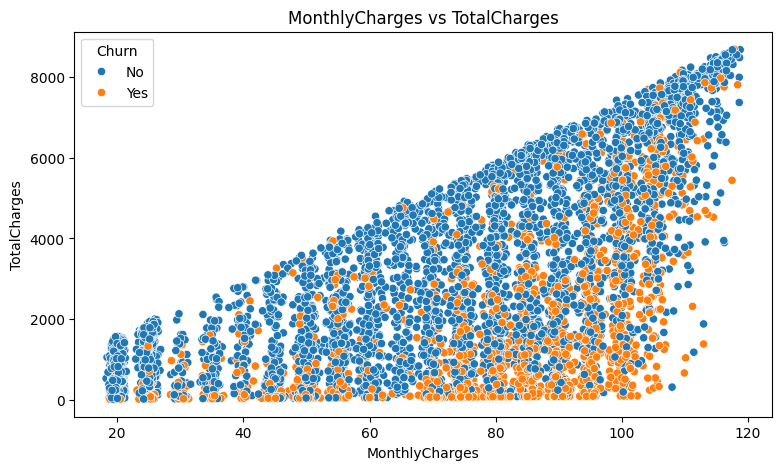

In [70]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.title('MonthlyCharges vs TotalCharges');

In [71]:
for var in num_cols:
    grupo_no = df[df["Churn"] == "No"][var].dropna()
    grupo_yes = df[df["Churn"] == "Yes"][var].dropna()
    
    stat, p = mannwhitneyu(grupo_no, grupo_yes, alternative='two-sided')
    
    print(f"\n{var.upper()}:")
    print(f"Mann–Whitney U = {stat:.2f}, p-valor = {p:.4f}")
    print(f"Mediana (No): {grupo_no.median():.2f} | Mediana (Yes): {grupo_yes.median():.2f}")
    if p < 0.05:
        print("→ Hay diferencia significativa entre los grupos.")
    else:
        print("→ No hay diferencia significativa entre los grupos.")


TENURE:
Mann–Whitney U = 7154668.00, p-valor = 0.0000
Mediana (No): 38.00 | Mediana (Yes): 10.00
→ Hay diferencia significativa entre los grupos.

MONTHLYCHARGES:
Mann–Whitney U = 3667080.50, p-valor = 0.0000
Mediana (No): 64.43 | Mediana (Yes): 79.65
→ Hay diferencia significativa entre los grupos.

TOTALCHARGES:
Mann–Whitney U = 6302281.00, p-valor = 0.0000
Mediana (No): 1679.53 | Mediana (Yes): 703.55
→ Hay diferencia significativa entre los grupos.


Se aplicó la prueba no paramétrica de Mann–Whitney U para comparar la distribución de tres variables numéricas ``(tenure, MonthlyCharges, TotalCharges)`` entre los grupos de clientes que se dieron de baja (Churn = Yes) y aquellos que permanecen en la empresa (Churn = No). Esta prueba es apropiada dado que las variables no presentan una distribución normal y los grupos son independientes.

Los resultados fueron estadísticamente significativos en los tres casos (p-valor < 0.0001), lo que indica que existen diferencias sustanciales en las distribuciones entre ambos grupos:

- ``Tenure (antigüedad):``
Los clientes que permanecen tienen una mediana de 38 meses , mientras que los que se dan de baja apenas alcanzan los 10 meses . Esto sugiere que los abandonos son más frecuentes durante los primeros meses de servicio , lo cual puede deberse a una falta de fidelización o experiencia negativa inicial.

- ``Monthly Charges (cargo mensual):``
Los clientes que se dan de baja pagan, en general, más al mes (mediana de 79,65 € frente a 64,43 €). Esto indica que las tarifas más altas podrían estar asociadas a un mayor riesgo de abandono , posiblemente por percepción de coste elevado o insatisfacción con el valor ofrecido.

- ``Total Charges (cobros acumulados):``
Los clientes que permanecen han generado un monto total más elevado (mediana de 1679,53 € vs. 703,55 €), lo que es consistente con su mayor tiempo de permanencia . Es decir, los clientes con historial de pagos más cortos tienden a abandonar antes .

En conjunto, estos resultados aportan evidencia cuantitativa para afirmar que los clientes nuevos y con cargos mensuales elevados están más propensos a abandonar , por lo que representan grupos prioritarios para acciones de retención .



Text(0.5, 0, 'Churn')

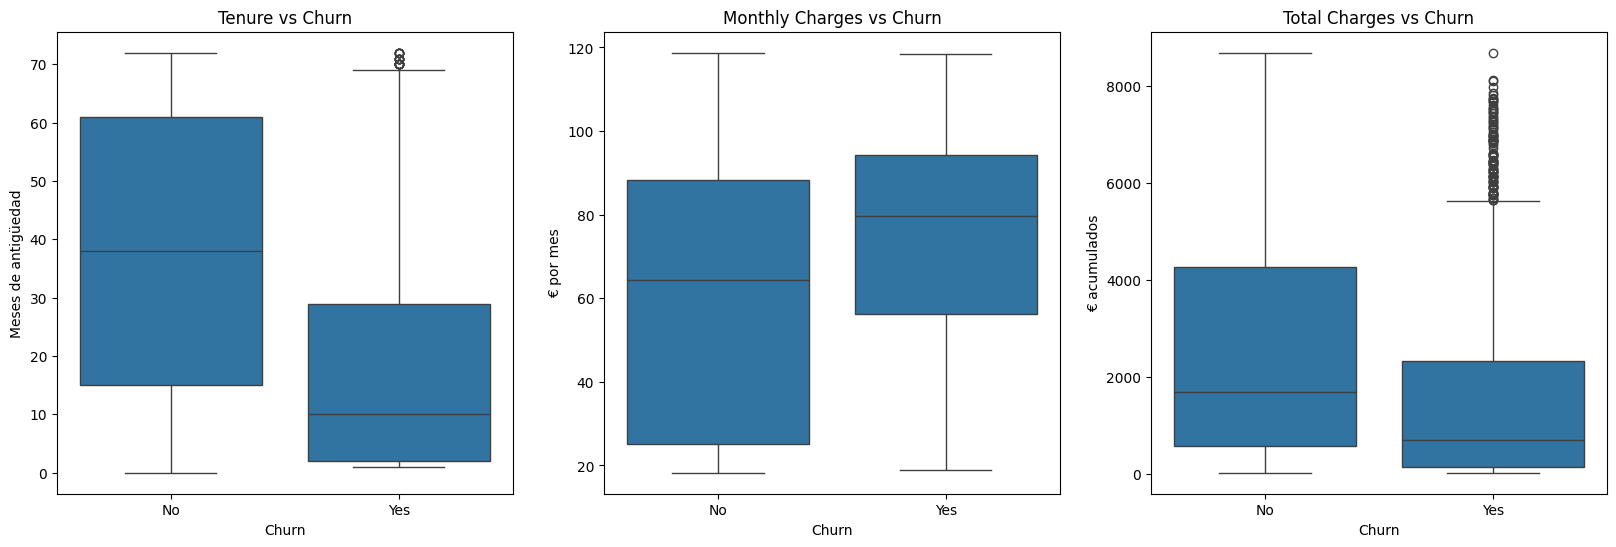

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(x="Churn", y="tenure", data=df, ax=axes[0])
axes[0].set_title("Tenure vs Churn")
axes[0].set_ylabel("Meses de antigüedad")
axes[0].set_xlabel("Churn")

sns.boxplot(x="Churn", y="MonthlyCharges", data=df, ax=axes[1])
axes[1].set_title("Monthly Charges vs Churn")
axes[1].set_ylabel("€ por mes")
axes[1].set_xlabel("Churn")

sns.boxplot(x="Churn", y="TotalCharges", data=df, ax=axes[2])
axes[2].set_title("Total Charges vs Churn")
axes[2].set_ylabel("€ acumulados")
axes[2].set_xlabel("Churn")

#### Los gráficos muestran diferencias claras entre clientes que se dan de baja (Churn = Yes) y los que permanecen (Churn = No):

- Tenure: Los que se quedan tienen mucha más antigüedad (mediana 38 vs. 10).
Los abandonos ocurren en los primeros meses.

- Cargos Mensuales: Los que se dan de baja pagan más al mes (mediana ~80 vs. ~64).
Cuotas altas se asocian a mayor churn.

- Cargos Totales: Los que se quedan han pagado mucho más en total.
Refleja su permanencia y valor como cliente.

En resumen: clientes nuevos y con cargos mensuales altos son los más propensos a darse de baja, y deben ser el foco de estrategias de retención.

------------------------------------------------------------------

-------------------------------------------

## Conclusiones Generales del Análisis.

- ``Churn`` elevado en clientes nuevos. La mayoría de los clientes que se dan de baja lo hacen en los primeros meses de relación con la empresa (mediana de antigüedad: 10 meses vs. 38 en los que permanecen).
→ Esto sugiere debilidad en la fase de fidelización inicial.

- Cargos mensuales altos = mayor riesgo de baja. Los clientes que abandonan pagan más por mes en promedio.
→ El precio puede estar percibiéndose como excesivo o no justificado por el servicio recibido.

- Clientes de mayor valor tienden a quedarse. Aquellos que no se dan de baja han generado más ingresos totales (mayor ``TotalCharges``).
→ Invertir en su fidelización puede tener un alto retorno.

- Relaciones significativas con variables de servicio y facturación. Variables como ``Contract, InternetService, OnlineSecurity, TechSupporty PaymentMethod`` tienen una fuerte asociación con el ``churn`` (verificado con Chi² y Cramér's V).
→ Estas variables pueden usarse para segmentar y anticipar comportamiento.

- Clientes con contrato mensual, sin servicios añadidos, ni soporte técnico son más propensos a abandonar.
→ Se identifican perfiles de alto riesgo sobre los cuales aplican estrategias proactivas de retención.

## Pricnipales Insights.

- **Foco en los primeros meses:** Implementar campañas de bienvenida, encuestas de satisfacción tempranas o promociones en los primeros 3–6 meses.

- **Ofertas personalizadas para clientes con cargos altos:** Incentiva la permanencia ofreciendo descuentos, paquetes combinados o valor agregado.

- **Fortalecer servicios de soporte y seguridad online:** Su ausencia está claramente asociada a mayor abandono.

- **Evaluar impacto del contrato mensual:** Analizar si modificar la oferta o los beneficios podría disminuir la tasa de baja.

-  **Segmentar por riesgo y actuar de forma preventiva:** Usar los perfiles identificados para priorizar acciones de retención.